In [52]:
import pandas as pd 
import numpy as np

In [2]:
marketshare =pd.read_excel("/Users/jessicakammann/Desktop/Research /Cellphone Market Share by Quarter.xlsx")

marketshare["Samsung_Research"] = marketshare["Samsung_Research"].astype(int)
marketshare.dtypes



Year                      object
Android                  float64
Apple                    float64
Apple_investment           int64
Samsung_Research           int64
android_price_average      int64
iphone_prices              int64
dtype: object

In [53]:
data = { 'date':['2011-Q1', '2011-Q2', '2011-Q3', '2011-Q4', '2012-Q1', '2012-Q2', '2012-Q3', '2012-Q4', '2013-Q1', '2013-Q2', '2013-Q3', '2013-Q4', '2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4', '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4',' 2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020- Q1',' 2020- Q2',' 2020- Q3',' 2020- Q4',' 2021- Q1',' 2021- Q2',' 2021- Q3',' 2021- Q4',' 2022- Q1',' 2022- Q2',' 2022- Q3',' 2022- Q4',' 2023- Q1',' 2023- Q2',' 2023- Q3',' 2023- Q4',' 2024- Q1',' 2024- Q2',' 2024- Q3',' 2024- Q4'], 
         'market_share_apple':['24.38','20.04','21.21','22.71','23.99','24.56','23.63','23.26','27.14','25.09','22.73','21.82','23.6','24.29','24.73','23.51','22.64','20.22','18.14','19.21','18.82','20.33','19.38','18.89','19.5','19.35','19.37','19.91','20.83','18.91','20.66','21.98','22.4','22.04','22.48','24.79','27.03','25.26','24.98','26.91','27.41','26.35','26.75','29.24','27.57','27.22','27.8','26.98','28.42','28.44','29.58','28.8','28.46','27.16','27.61','26.04'],
         'market_share_android': ['15.82','17.92','20.9','21.83','23.61','25.07','29.25','33.19','37.23','37.93','39.82','42.99','48.26','52.98','55.7','59.15','61.94','63.75','66.77','65.9','68.04','68.39','69.68','71.97','71.61','72.89','73.52','73.54','74.24','76.99','76.61','75.16','75.33','76.03','76.24','74.13','72.26','74.14','74.44','72.48','71.83','72.83','72.44','70.01','71.7','72.12','71.55','72.37','70.88','70.79','69.74','70.48','70.78','72.17','71.84','73.49'],
         'Apple_investment':['581','628','645','758','841','876','628','906','1,010','1,119','1,178','1,168','1,330','1,422','1,603','1,686','1,895','1,918','2,034','2,220','2,404','2,511','2,560','2,570','2,871','2,776','2,937','2,997','3407','3378','3701','3750','3948','4257','4110','4451','4565','4758','4978','5163','5262','5717','5772','6306','6387','6797','6761','7709','7457','7442','7307',' $7,696 ',' $7,903',' $8,006',' $7,765',' $8,268'],
         'Samsung_Research': ['16.14','17.39','16.75','18.85','18.8','19.77','20.58','20.53','22.92','24.45','25.17','25.96','25.28','25.63','22.92735','25.16807','24.05','23.0894','23.55','23.838708','24.6','24.19','24.19','24.39','25.974546','27.352506','28.799364','30.521814','29.074956','30.848426','35.18','36.102552','33.76002','34.10451','35.344674','33.7241544','36.929328','35.964756','36.584838','35.964756','37.480512','37.067124','35.206878','44.577006','40.787616','43.06125','43.199046','44.545946','45.334884','49.656','48.297498','52.01799','53.878236','49.60656','48.297498','51.66735'],
         'android_price_average': ['380,','380','380','380','380','320','320','320','276','276','276','276','254','254','254','254','232','232','232','232','220','220','220','220','235','235','235','235','254','254','254','254','270','270','270','270','292','292','292','292','296','296','296','296','300','300','300','300','305','305','305','305','305','305', '305','305'],
         'iphone_prices': ['199','199','199','199','199','199','199','199','99','99','99','99','249','249','249','249','249','249','249','249','606','606','606','606','832','832','832','832','949','949','949','949','933','933','933','933','999','999','999','999','899','899','899','899','949','949','949','949','974','974','974','974','974','974','974','974']

    
}

In [54]:
#https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm
import statsmodels.formula.api as smf


Regression Model for Android

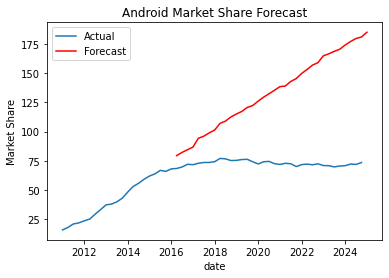

In [56]:
# Fit regression model (using the natural log of one of the regressors)
#Linear Regression for Android 
#results = smf.ols('Android ~ + iphone_prices + android_price_average + Samsung_Research + Apple_investment ', data=marketshare).fit()
#print(results.summary())

# Strip leading/trailing spaces from 'date' strings
data['date'] = [d.strip().replace(' ', '') for d in data['date']]

 #Convert 'date' to datetime by parsing year and quarter
def parse_quarter(date_str):
    year, quarter = date_str.strip().split('-')
    quarter_start_month = {'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10}
    return pd.Timestamp(year=int(year), month=quarter_start_month[quarter], day=1)

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'].apply(parse_quarter))
#df.set_index('date', inplace=True)

df['date_numeric']= (df['date'] - df['date'].min()).dt.days





# Convert market share and other columns to numeric, handling errors 
df['market_share_apple'] = pd.to_numeric(df['market_share_apple'], errors='coerce')
df['market_share_android'] = pd.to_numeric(df['market_share_android'], errors='coerce')
df['Apple_investment'] = pd.to_numeric(df['Apple_investment'].str.replace(',', '').str.replace('$', ''), errors='coerce')
df['Samsung_Research'] = pd.to_numeric(df['Samsung_Research'], errors='coerce')
df['android_price_average'] = pd.to_numeric(df['android_price_average'].str.replace(',', ''), errors='coerce')
df['iphone_prices'] = pd.to_numeric(df['iphone_prices'], errors='coerce')

# Drop rows with missing or invalid data
df.dropna(inplace=True)

Y = df['market_share_android']
X = df[['market_share_apple','Apple_investment', 'Samsung_Research', 'android_price_average', 'iphone_prices', 'date_numeric']]

# Reset index to access 'date' column for forecasting
df.reset_index(inplace=True)

# Split data into training and testing sets
X_train = X.iloc[0:20,:]
X_test = X.iloc[20:,:]
y_train = Y.iloc[0:20]
y_test = Y.iloc[20:]

train = pd.concat([X_train, y_train], axis=1)
results = smf.ols('market_share_android ~  date_numeric + market_share_apple+ iphone_prices + android_price_average + Samsung_Research + Apple_investment ', data=train).fit()
forecast =results.predict(X_test)
forecast_index = pd.date_range(start = df['date'].iloc[-len(X_test)], periods=len(X_test), freq='Q')

# Plot the data
import matplotlib.pyplot as plt
plt.plot(df['date'], df['market_share_android'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('date')
plt.ylabel('Market Share')
plt.title('Android Market Share Forecast')
plt.legend()
plt.show()



#R-squared --adjusted Rsquared --.932 , 93% can be explained by these four variables 
#look at P variable, alot auto correlation, everything is correlated with inflation, everything goes bigger overtime, maybe need to adjust for adjust
# Regression Model Apple
#divide by 100 million market research 
#how do we do we do the payoff matrix 

Regression Model Apple Versus Android

                             OLS Regression Results                             
Dep. Variable:     market_share_android   R-squared:                       0.993
Model:                              OLS   Adj. R-squared:                  0.989
Method:                   Least Squares   F-statistic:                     296.9
Date:                  Tue, 29 Apr 2025   Prob (F-statistic):           3.87e-13
Time:                          09:29:15   Log-Likelihood:                -35.635
No. Observations:                    20   AIC:                             85.27
Df Residuals:                        13   BIC:                             92.24
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

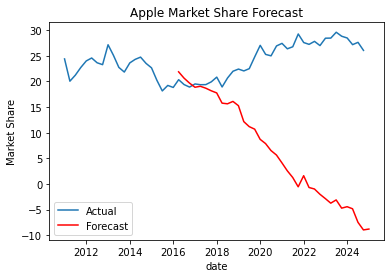

In [57]:
# Fit regression model (using the natural log of one of the regressors)
#Linear Regression for Apple 
#results = smf.ols('Apple ~ Android + iphone_prices + android_price_average + Samsung_Research + Apple_investment ', data=marketshare).fit()
print(results.summary())

# Strip leading/trailing spaces from 'date' strings
data['date'] = [d.strip().replace(' ', '') for d in data['date']]


# Convert 'date' to datetime by parsing year and quarter
def parse_quarter(date_str):
    year, quarter = date_str.strip().split('-')
    quarter_start_month = {'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10}
    return pd.Timestamp(year=int(year), month=quarter_start_month[quarter], day=1)

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'].apply(parse_quarter))
#df.set_index('date', inplace=True)

df['date_numeric']= (df['date'] - df['date'].min()).dt.days

# Convert market share and other columns to numeric, handling errors 
df['market_share_apple'] = pd.to_numeric(df['market_share_apple'], errors='coerce')
df['market_share_android'] = pd.to_numeric(df['market_share_android'], errors='coerce')
df['Apple_investment'] = pd.to_numeric(df['Apple_investment'].str.replace(',', '').str.replace('$', ''), errors='coerce')
df['Samsung_Research'] = pd.to_numeric(df['Samsung_Research'], errors='coerce')
df['android_price_average'] = pd.to_numeric(df['android_price_average'].str.replace(',', ''), errors='coerce')
df['iphone_prices'] = pd.to_numeric(df['iphone_prices'], errors='coerce')

# Drop rows with missing or invalid data
df.dropna(inplace=True)

Y = df['market_share_apple']
X = df[['market_share_android','Apple_investment', 'Samsung_Research', 'android_price_average', 'iphone_prices', 'date_numeric']]

# Reset index to access 'date' column for forecasting
df.reset_index(inplace=True)

# Split data into training and testing sets
X_train = X.iloc[0:20,:]
X_test = X.iloc[20:,:]
y_train = Y.iloc[0:20]
y_test = Y.iloc[20:]
y_test = Y.iloc[20:]
train = pd.concat([X_train, y_train], axis=1)
results = smf.ols('market_share_apple ~ date_numeric + market_share_android + iphone_prices + android_price_average + Samsung_Research + Apple_investment ', data=train).fit()
forecast =results.predict(X_test)
forecast_index = pd.date_range(start = df['date'].iloc[-len(X_test)], periods=len(X_test), freq='Q')

# Plot the data
import matplotlib.pyplot as plt
plt.plot(df['date'], df['market_share_apple'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('date')
plt.ylabel('Market Share')
plt.title('Apple Market Share Forecast')
plt.legend()
plt.show()
#linear respect to prices, investment and research not time



In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     market_share_apple   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     14.21
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           1.60e-07
Time:                        12:58:31   Log-Likelihood:                -70.581
No. Observations:                  40   AIC:                             153.2
Df Residuals:                      34   BIC:                             163.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                36.2099      8.745      4.141      0.000      18.439      53.981
market_share_android     -0.3006      0.082     -3.679      0.001      -0.467      -0.135
iphone_prices            -0.0051      0.002     -2.277      0.029      -0.010      -0.001
android_price_average    -0.0370      0.019     -1.902      0.066      -0.077       0.003
Samsung_Research          0.3095      0.117      2.637      0.013       0.071       0.548
Apple_investment          0.0033      0.001      3.384      0.002       0.001       0.005
==============================================================================
Omnibus:                        0.661   Durbin-Watson:                   1.102
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.176
Skew:                           0.138   Prob(JB):                        0.916
Kurtosis:                       3.173   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#transfer market share to coefficient

#rate is the matrix times 

———————————
#compete the market share, small network , apple one, andorid , price 

#neuron here each one is an input, and combine them into 4 intermiate nodes 

#final output percentage of market share

#—study difference 4 inputs 

———————————————————————
#market share, 

#predict , different models , use different regression, 
#how to predict the market share 
#maybe linear is not ideal 
#different — use last percent of data to predict 

#alternative way ———
#build a predictor in a different way 


#Sarima model
#

In [ ]:
# Fit regression model (using the natural log of one of the regressors) Regression 3 
#Linear Regression for Apple without Samsung
results = smf.ols('Apple ~ + iphone_prices + Apple_investment ', data=marketshare).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Apple   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     38.31
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           5.10e-11
Time:                        11:30:27   Log-Likelihood:                -121.02
No. Observations:                  56   AIC:                             248.0
Df Residuals:                      53   BIC:                             254.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           21.8663      0.609  

In [ ]:
# Fit regression model (using the natural log of one of the regressors)
#Linear Regression for Android without Apple
results = smf.ols('Android ~ + android_price_average + Samsung_Research ', data=marketshare).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Android   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     147.3
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           2.27e-22
Time:                        11:30:30   Log-Likelihood:                -189.50
No. Observations:                  56   AIC:                             385.0
Df Residuals:                      53   BIC:                             391.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               100.02

In [ ]:
#Linear Regression , Decision Tree, Random Forest, Neural Network
#for Android
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df=pd.DataFrame(marketshare)

X = df [['Apple', 'Apple_investment', 'Samsung_Research', 'android_price_average', 'iphone_prices']]
Y= df ['Android']

#Split data into training and testing sets
X_train = X.iloc[0:40,:]
X_test = X.iloc[40:,:]
y_train = Y.iloc[0:40]
y_test = Y.iloc[40:]



model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = model.score(X_test, y_test)
print(f"R^2 Score: {r2}")

#Time Series models--- look at those 


Mean Squared Error: 1.6168790248775349
R^2 Score: -0.5999025588198097


In [ ]:
#Linear Regression , Decision Tree, Random Forest, Neural Network
#for Android
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df=pd.DataFrame(marketshare)

X = df [['Android', 'Apple_investment', 'Samsung_Research', 'android_price_average', 'iphone_prices']]
Y= df ['Apple']

#Split data into training and testing sets
X_train = X.iloc[0:40,:]
X_test = X.iloc[40:,:]
y_train = Y.iloc[0:40]
y_test = Y.iloc[40:]



model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = model.score(X_test, y_test)
print(f"R^2 Score: {r2}")


Mean Squared Error: 3.212872485624951
R^2 Score: -2.343500163700268


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:     market_share_apple   No. Observations:                   40
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -66.147
Date:                Sun, 27 Apr 2025   AIC                            148.294
Time:                        12:05:18   BIC                            161.805
Sample:                    01-01-2011   HQIC                           153.179
                         - 10-01-2020                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    36.2078      8.953      4.044      0.000      18.660      53.755
market_share_android     -0.2732      0.085     -3.209      0.001      -0.440      -0.106
Apple_in

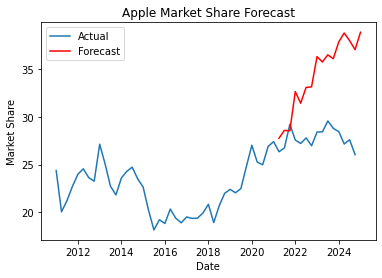

Root Mean Squared Error: 7.5453154845820265


ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [ ]:
#ARIMA model test if the 
#Apple 
#How do I add the rest of the constraints to this model?
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

data = { 'date':['2011-Q1', '2011-Q2', '2011-Q3', '2011-Q4', '2012-Q1', '2012-Q2', '2012-Q3', '2012-Q4', '2013-Q1', '2013-Q2', '2013-Q3', '2013-Q4', '2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4', '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4',' 2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020- Q1',' 2020- Q2',' 2020- Q3',' 2020- Q4',' 2021- Q1',' 2021- Q2',' 2021- Q3',' 2021- Q4',' 2022- Q1',' 2022- Q2',' 2022- Q3',' 2022- Q4',' 2023- Q1',' 2023- Q2',' 2023- Q3',' 2023- Q4',' 2024- Q1',' 2024- Q2',' 2024- Q3',' 2024- Q4'], 
         'market_share_apple':['24.38','20.04','21.21','22.71','23.99','24.56','23.63','23.26','27.14','25.09','22.73','21.82','23.6','24.29','24.73','23.51','22.64','20.22','18.14','19.21','18.82','20.33','19.38','18.89','19.5','19.35','19.37','19.91','20.83','18.91','20.66','21.98','22.4','22.04','22.48','24.79','27.03','25.26','24.98','26.91','27.41','26.35','26.75','29.24','27.57','27.22','27.8','26.98','28.42','28.44','29.58','28.8','28.46','27.16','27.61','26.04'],
         'market_share_android': ['15.82','17.92','20.9','21.83','23.61','25.07','29.25','33.19','37.23','37.93','39.82','42.99','48.26','52.98','55.7','59.15','61.94','63.75','66.77','65.9','68.04','68.39','69.68','71.97','71.61','72.89','73.52','73.54','74.24','76.99','76.61','75.16','75.33','76.03','76.24','74.13','72.26','74.14','74.44','72.48','71.83','72.83','72.44','70.01','71.7','72.12','71.55','72.37','70.88','70.79','69.74','70.48','70.78','72.17','71.84','73.49'],
         'Apple_investment':['581','628','645','758','841','876','628','906','1,010','1,119','1,178','1,168','1,330','1,422','1,603','1,686','1,895','1,918','2,034','2,220','2,404','2,511','2,560','2,570','2,871','2,776','2,937','2,997','3407','3378','3701','3750','3948','4257','4110','4451','4565','4758','4978','5163','5262','5717','5772','6306','6387','6797','6761','7709','7457','7442','7307',' $7,696 ',' $7,903',' $8,006',' $7,765',' $8,268'],
         'Samsung_Research': ['16.14','17.39','16.75','18.85','18.8','19.77','20.58','20.53','22.92','24.45','25.17','25.96','25.28','25.63','22.92735','25.16807','24.05','23.0894','23.55','23.838708','24.6','24.19','24.19','24.39','25.974546','27.352506','28.799364','30.521814','29.074956','30.848426','35.18','36.102552','33.76002','34.10451','35.344674','33.7241544','36.929328','35.964756','36.584838','35.964756','37.480512','37.067124','35.206878','44.577006','40.787616','43.06125','43.199046','44.545946','45.334884','49.656','48.297498','52.01799','53.878236','49.60656','48.297498','51.66735'],
         'android_price_average': ['380,','380','380','380','380','320','320','320','276','276','276','276','254','254','254','254','232','232','232','232','220','220','220','220','235','235','235','235','254','254','254','254','270','270','270','270','292','292','292','292','296','296','296','296','300','300','300','300','305','305','305','305','305','305', '305','305'],
         'iphone_prices': ['199','199','199','199','199','199','199','199','99','99','99','99','249','249','249','249','249','249','249','249','606','606','606','606','832','832','832','832','949','949','949','949','933','933','933','933','999','999','999','999','899','899','899','899','949','949','949','949','974','974','974','974','974','974','974','974']

    
}

# Strip leading/trailing spaces from 'date' strings
data['date'] = [d.strip().replace(' ', '') for d in data['date']]


# Convert 'date' to datetime by parsing year and quarter
def parse_quarter(date_str):
    year, quarter = date_str.split('-')
    quarter_start_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
    return f"{year}-{quarter_start_month[quarter]}-01"

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'].apply(parse_quarter))
df.set_index('date', inplace=True)

# Convert market share and other columns to numeric, handling errors 
df['market_share_apple'] = pd.to_numeric(df['market_share_apple'], errors='coerce')
df['market_share_android'] = pd.to_numeric(df['market_share_android'], errors='coerce')
df['Apple_investment'] = pd.to_numeric(df['Apple_investment'].str.replace(',', '').str.replace('$', ''), errors='coerce')
df['Samsung_Research'] = pd.to_numeric(df['Samsung_Research'], errors='coerce')
df['android_price_average'] = pd.to_numeric(df['android_price_average'].str.replace(',', ''), errors='coerce')
df['iphone_prices'] = pd.to_numeric(df['iphone_prices'], errors='coerce')

# Drop rows with missing or invalid data
df.dropna(inplace=True)

Y = df['market_share_apple']
X = df[['market_share_android','Apple_investment', 'Samsung_Research', 'android_price_average', 'iphone_prices']]

# Reset index to access 'date' column for forecasting
df.reset_index(inplace=True)

# Split data into training and testing sets
X_train = X.iloc[0:40,:]
X_test = X.iloc[40:,:]
y_train = Y.iloc[0:40]
y_test = Y.iloc[40:]

#confirmed downwards 
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_train, exog=X_train, order=(0, 0, 1))

model_fit = model.fit()
print(model_fit.summary())

# Forecast the next 4 quarters
forecast = model_fit.forecast(steps=len(X_test), exog=X_test)

# Create a datetime index for the forecast
forecast_index = pd.date_range(start=df['date'].iloc[39], periods=len(X_test) + 1, freq='Q')[1:]

# Plot the data
import matplotlib.pyplot as plt
plt.plot(df['date'], df['market_share_apple'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Market Share')
plt.title('Apple Market Share Forecast')
plt.legend()
plt.show()
   
# Root Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, forecast))
print(f"Root Mean Squared Error: {rmse}")
# Mean Average Percentage Error
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, forecast)
print(f"Mean Absolute Percentage Error: {mape}")

#stationarity == not stationary 
#might want to do -- play with the 1,1,1 ---
# look at what is seasonal order is
#looks back and see what happened before, and uses that to predict

In [ ]:
#will tell me automatically what tthe best parameters are based of the grid search
from pmdarima import auto_arima

model = auto_arima(y_train, X_train, seasonal=False, stepwise=True, suppress_warnings=True)
print(model.summary())

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
#will tell me automatically what tthe best parameters are based of the grid search for Android
Y = df['market_share_android']
X = df[['market_share_apple','Apple_investment', 'Samsung_Research', 'android_price_average', 'iphone_prices']]
X_train = X.iloc[0:40,:]
X_test = X.iloc[40:,:]
y_train = Y.iloc[0:40]
y_test = Y.iloc[40:]

from pmdarima import auto_arima

model = auto_arima(y_train, X_train, seasonal=False, stepwise=True, suppress_warnings=True)
print(model.summary())

Compare AIC between one model versus the other, AIC is way to comparing models between 


Train test split


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


                                SARIMAX Results                                 
Dep. Variable:     market_share_android   No. Observations:                   40
Model:                   ARIMA(1, 0, 2)   Log Likelihood                 -90.065
Date:                  Sun, 27 Apr 2025   AIC                            200.130
Time:                          12:14:56   BIC                            217.019
Sample:                      01-01-2011   HQIC                           206.237
                           - 10-01-2020                                         
Covariance Type:                    opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   106.9294      9.423     11.348      0.000      88.461     125.398
market_share_apple       -1.0525      0.227     -4.641      0.000      -1.497     

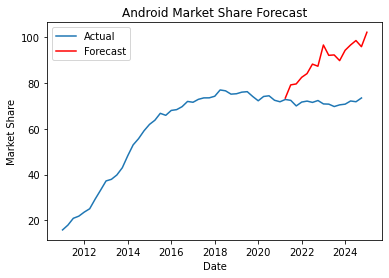

Root Mean Squared Error: 19.61982655562467


ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [ ]:
#ARIMA model test if the 
#Android
#How do I add the rest of the constraints to this model?

data = { 'date':['2011-Q1', '2011-Q2', '2011-Q3', '2011-Q4', '2012-Q1', '2012-Q2', '2012-Q3', '2012-Q4', '2013-Q1', '2013-Q2', '2013-Q3', '2013-Q4', '2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4', '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4',' 2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020- Q1',' 2020- Q2',' 2020- Q3',' 2020- Q4',' 2021- Q1',' 2021- Q2',' 2021- Q3',' 2021- Q4',' 2022- Q1',' 2022- Q2',' 2022- Q3',' 2022- Q4',' 2023- Q1',' 2023- Q2',' 2023- Q3',' 2023- Q4',' 2024- Q1',' 2024- Q2',' 2024- Q3',' 2024- Q4'], 
         'market_share_apple':['24.38','20.04','21.21','22.71','23.99','24.56','23.63','23.26','27.14','25.09','22.73','21.82','23.6','24.29','24.73','23.51','22.64','20.22','18.14','19.21','18.82','20.33','19.38','18.89','19.5','19.35','19.37','19.91','20.83','18.91','20.66','21.98','22.4','22.04','22.48','24.79','27.03','25.26','24.98','26.91','27.41','26.35','26.75','29.24','27.57','27.22','27.8','26.98','28.42','28.44','29.58','28.8','28.46','27.16','27.61','26.04'],
         'market_share_android': ['15.82','17.92','20.9','21.83','23.61','25.07','29.25','33.19','37.23','37.93','39.82','42.99','48.26','52.98','55.7','59.15','61.94','63.75','66.77','65.9','68.04','68.39','69.68','71.97','71.61','72.89','73.52','73.54','74.24','76.99','76.61','75.16','75.33','76.03','76.24','74.13','72.26','74.14','74.44','72.48','71.83','72.83','72.44','70.01','71.7','72.12','71.55','72.37','70.88','70.79','69.74','70.48','70.78','72.17','71.84','73.49'],
         'Apple_investment':['581','628','645','758','841','876','628','906','1,010','1,119','1,178','1,168','1,330','1,422','1,603','1,686','1,895','1,918','2,034','2,220','2,404','2,511','2,560','2,570','2,871','2,776','2,937','2,997','3407','3378','3701','3750','3948','4257','4110','4451','4565','4758','4978','5163','5262','5717','5772','6306','6387','6797','6761','7709','7457','7442','7307',' $7,696 ',' $7,903',' $8,006',' $7,765',' $8,268'],
         'Samsung_Research': ['16.14','17.39','16.75','18.85','18.8','19.77','20.58','20.53','22.92','24.45','25.17','25.96','25.28','25.63','22.92735','25.16807','24.05','23.0894','23.55','23.838708','24.6','24.19','24.19','24.39','25.974546','27.352506','28.799364','30.521814','29.074956','30.848426','35.18','36.102552','33.76002','34.10451','35.344674','33.7241544','36.929328','35.964756','36.584838','35.964756','37.480512','37.067124','35.206878','44.577006','40.787616','43.06125','43.199046','44.545946','45.334884','49.656','48.297498','52.01799','53.878236','49.60656','48.297498','51.66735'],
         'android_price_average': ['380,','380','380','380','380','320','320','320','276','276','276','276','254','254','254','254','232','232','232','232','220','220','220','220','235','235','235','235','254','254','254','254','270','270','270','270','292','292','292','292','296','296','296','296','300','300','300','300','305','305','305','305','305','305', '305','305'],
         'iphone_prices': ['199','199','199','199','199','199','199','199','99','99','99','99','249','249','249','249','249','249','249','249','606','606','606','606','832','832','832','832','949','949','949','949','933','933','933','933','999','999','999','999','899','899','899','899','949','949','949','949','974','974','974','974','974','974','974','974']

    
}
# Strip leading/trailing spaces from 'date' strings
data['date'] = [d.strip().replace(' ', '') for d in data['date']]


# Convert 'date' to datetime by parsing year and quarter
def parse_quarter(date_str):
    year, quarter = date_str.split('-')
    quarter_start_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
    return f"{year}-{quarter_start_month[quarter]}-01"

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'].apply(parse_quarter))
df.set_index('date', inplace=True)

# Convert market share and other columns to numeric, handling errors 
df['market_share_apple'] = pd.to_numeric(df['market_share_apple'], errors='coerce')
df['market_share_android'] = pd.to_numeric(df['market_share_android'], errors='coerce')
df['Apple_investment'] = pd.to_numeric(df['Apple_investment'].str.replace(',', '').str.replace('$', ''), errors='coerce')
df['Samsung_Research'] = pd.to_numeric(df['Samsung_Research'], errors='coerce')
df['android_price_average'] = pd.to_numeric(df['android_price_average'].str.replace(',', ''), errors='coerce')
df['iphone_prices'] = pd.to_numeric(df['iphone_prices'], errors='coerce')

# Drop rows with missing or invalid data
df.dropna(inplace=True)

Y = df['market_share_android']
X = df[['market_share_apple','Apple_investment', 'Samsung_Research', 'android_price_average', 'iphone_prices']]

# Reset index to access 'date' column for forecasting
df.reset_index(inplace=True)

# Split data into training and testing sets
X_train = X.iloc[0:40,:]
X_test = X.iloc[40:,:]
y_train = Y.iloc[0:40]
y_test = Y.iloc[40:]

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_train, exog=X_train, order=(1, 0, 2))

model_fit = model.fit()
print(model_fit.summary())

# Forecast the next 4 quarters
forecast = model_fit.forecast(steps=len(X_test), exog=X_test)

# Create a datetime index for the forecast
forecast_index = pd.date_range(start=df['date'].iloc[39], periods=len(X_test) + 1, freq='Q')[1:]

# Plot the data
import matplotlib.pyplot as plt
plt.plot(df['date'], df['market_share_android'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Market Share')
plt.title('Android Market Share Forecast')
plt.legend()
plt.show()
   
# Root Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, forecast))
print(f"Root Mean Squared Error: {rmse}")
# Mean Average Percentage Error
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, forecast)
print(f"Mean Absolute Percentage Error: {mape}")

#stationarity == not stationary 
#might want to do -- play with the 1,1,1 ---
# look at what is seasonal order is
#looks back and see what happened before, and uses that to predict